## Link --> https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

`Content`

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

* ID: The title ID on JustWatch.
* title: The name of the title.
* show type: TV show or movie.
* description: A brief description.
* release year: The release year.
* age certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* IMDB ID: The title ID on IMDB.
* IMDB Score: Score on IMDB.
* IMDB Votes: Votes on IMDB.
* TMDB Popularity: Popularity on TMDB.
* TMDB Score: Score on TMDB.

And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

* person ID: The person ID on JustWatch.
* ID: The title ID on JustWatch.
* name: The actor or director's name.
* character name: The character name.
* role: ACTOR or DIRECTOR.

`Tasks`
* Developing a content-based recommender system using the genres and/or descriptions.
* Identifying the main content available on the streaming.
* Network analysis on the cast of the titles.
* Exploratory data analysis to find interesting insights.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
credits = pd.read_csv("credits.csv")

In [8]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [3]:
titles = pd.read_csv("titles.csv")
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [33]:
titles.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

## numerical_features

In [4]:
# numerical_features
numerical_features = [features for features in titles if titles[features].dtype != 'O']
numerical_features

['release_year',
 'runtime',
 'seasons',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']

## Observation 
`titles dataset` has `7 numerical_features`..

## categorical features

In [5]:
# categorical features
categorical_features = [features for features in titles if titles[features].dtype == 'O']
categorical_features

['id',
 'title',
 'type',
 'description',
 'age_certification',
 'genres',
 'production_countries',
 'imdb_id']

## Observation 
`titles dataset` has `8 categorical_features`..

In [6]:
miss = dict(titles.isnull().sum())

In [7]:
missing_features_info = []
for x, y in miss.items():
    if y != 0:
        missing_features_info.append(f"{x} = {y}")

## missing features with values

In [8]:
missing_features_info

['title = 1',
 'description = 18',
 'age_certification = 2610',
 'seasons = 3759',
 'imdb_id = 444',
 'imdb_score = 523',
 'imdb_votes = 539',
 'tmdb_popularity = 94',
 'tmdb_score = 318']

## Observation 
`titles dataset` has `9 features` having missing values..

In [9]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
genres = titles["genres"]

In [6]:
genres

0                       ['documentation']
1                      ['crime', 'drama']
2                   ['comedy', 'fantasy']
3                              ['comedy']
4                              ['horror']
                      ...                
5801                 ['romance', 'drama']
5802           ['music', 'documentation']
5803                  ['family', 'drama']
5804               ['action', 'thriller']
5805    ['family', 'comedy', 'animation']
Name: genres, Length: 5806, dtype: object

In [33]:
len(titles[titles["genres"] == "['drama']"])

350

In [34]:
titles[titles["genres"] == "['drama']"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
23,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,tt0077751,7.2,1689.0,1.736,6.0
36,tm200475,"Beirut, Oh Beirut",MOVIE,"In the aftermath of the 1967 defeat, four youn...",1975,NaN,110,['drama'],['LB'],NaN,tt0169599,6.5,106.0,1.104,7.3
39,tm344089,Lal Patthar,MOVIE,Raja Kumar Bahadur alias Gyan Shankar Rai has ...,1971,NaN,153,['drama'],['IN'],NaN,tt0237395,6.2,137.0,0.732,7.0
48,tm111075,Stand by Me,MOVIE,"Gordie, Chris, Teddy and Vern are four friends...",1986,R,89,['drama'],['US'],NaN,tt0092005,8.1,392790.0,16.096,7.9
73,tm114356,The George McKenna Story,MOVIE,Washington plays a school principal in a tough...,1988,NaN,100,['drama'],['US'],NaN,tt0091106,6.0,901.0,1.631,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.8,339.0,NaN,NaN
5776,tm1091956,A Faraway Land,MOVIE,"In the Faroe Islands, a married woman meets a ...",2021,NaN,101,['drama'],"['PH', 'FO']",NaN,tt15260940,4.9,133.0,1.509,6.7
5782,tm1080697,Binti,MOVIE,Four Tanzanian women are unknowingly connected...,2021,NaN,99,['drama'],"['TZ', 'GB']",NaN,tt11867140,5.7,118.0,2.535,9.0
5784,tm993616,The Tambour of Retribution,MOVIE,The son of the swordsman falls in love with th...,2021,NaN,92,['drama'],['SA'],NaN,tt13657102,6.9,966.0,1.340,7.5


In [15]:
genres_list = []
for i in genres:
    movies_in_genres = len(titles[titles["genres"] == i])
    genres_list.append(f"{i} : {movies_in_genres}") 

In [16]:
genres_list

["['documentation'] : 320",
 "['crime', 'drama'] : 20",
 "['comedy', 'fantasy'] : 3",
 "['comedy'] : 510",
 "['horror'] : 21",
 "['comedy', 'european'] : 35",
 "['thriller', 'crime', 'action'] : 10",
 "['drama', 'music', 'romance', 'family'] : 1",
 "['romance', 'drama'] : 55",
 "['drama', 'crime', 'action'] : 3",
 "['western', 'action', 'european'] : 1",
 "['war', 'action', 'drama'] : 1",
 "['comedy', 'animation', 'action', 'fantasy', 'family'] : 1",
 "['comedy', 'documentation'] : 93",
 "['western', 'crime'] : 1",
 "['romance', 'comedy', 'music'] : 3",
 "['drama', 'crime', 'comedy'] : 4",
 "['documentation', 'history', 'european'] : 8",
 "['comedy', 'documentation', 'music'] : 1",
 "['drama', 'war', 'action', 'history', 'romance'] : 1",
 "['drama', 'thriller', 'crime'] : 29",
 "['drama', 'action', 'romance', 'thriller'] : 1",
 "['drama'] : 350",
 "['drama', 'thriller', 'crime', 'history'] : 1",
 "['comedy', 'drama'] : 141",
 "['fantasy'] : 11",
 "['drama', 'comedy', 'romance', 'action

In [17]:
no_of_movies_in_genres = {}
for i,x in enumerate(genres_list):
    data = genres_list[i].split(" :")
    no_of_movies_in_genres[data[0]] = int(data[1])

In [45]:
no_of_movies_in_genres

{"['documentation']": 320,
 "['crime', 'drama']": 20,
 "['comedy', 'fantasy']": 3,
 "['comedy']": 510,
 "['horror']": 21,
 "['comedy', 'european']": 35,
 "['thriller', 'crime', 'action']": 10,
 "['drama', 'music', 'romance', 'family']": 1,
 "['romance', 'drama']": 55,
 "['drama', 'crime', 'action']": 3,
 "['western', 'action', 'european']": 1,
 "['war', 'action', 'drama']": 1,
 "['comedy', 'animation', 'action', 'fantasy', 'family']": 1,
 "['comedy', 'documentation']": 93,
 "['western', 'crime']": 1,
 "['romance', 'comedy', 'music']": 3,
 "['drama', 'crime', 'comedy']": 4,
 "['documentation', 'history', 'european']": 8,
 "['comedy', 'documentation', 'music']": 1,
 "['drama', 'war', 'action', 'history', 'romance']": 1,
 "['drama', 'thriller', 'crime']": 29,
 "['drama', 'action', 'romance', 'thriller']": 1,
 "['drama']": 350,
 "['drama', 'thriller', 'crime', 'history']": 1,
 "['comedy', 'drama']": 141,
 "['fantasy']": 11,
 "['drama', 'comedy', 'romance', 'action', 'crime']": 1,
 "['roman

In [35]:
genre, max_no_movies = None, 0
for i in no_of_movies_in_genres:
    if no_of_movies_in_genres[i] >= max_no_movies:
        genre = i 
        max_no_movies = no_of_movies_in_genres[i]
        print(genre, max_no_movies)

['documentation'] 320
['comedy'] 510


In [36]:
no_of_movies_in_genres["['drama']"]

350

In [7]:
for i in genres:
    print(i)

['documentation']
['crime', 'drama']
['comedy', 'fantasy']
['comedy']
['horror']
['comedy', 'european']
['thriller', 'crime', 'action']
['drama', 'music', 'romance', 'family']
['romance', 'drama']
['drama', 'crime', 'action']
['western', 'action', 'european']
['war', 'action', 'drama']
['comedy', 'animation', 'action', 'fantasy', 'family']
['comedy', 'documentation']
['western', 'crime']
['romance', 'comedy', 'music']
['drama', 'crime', 'comedy']
['documentation']
['documentation', 'history', 'european']
['comedy', 'documentation', 'music']
['drama', 'war', 'action', 'history', 'romance']
['drama', 'thriller', 'crime']
['drama', 'action', 'romance', 'thriller']
['drama']
['drama', 'thriller', 'crime', 'history']
['comedy', 'drama']
['fantasy']
['drama', 'comedy', 'romance', 'action', 'crime']
['romance', 'crime', 'drama']
['comedy']
['drama', 'crime']
['romance']
['comedy']
['comedy']
['comedy']
['comedy', 'drama', 'romance']
['drama']
['documentation']
['documentation']
['drama']
['ro

['documentation', 'reality']
['comedy', 'romance', 'european']
['drama', 'crime', 'history', 'european']
['comedy']
['comedy', 'documentation']
['documentation', 'european']
['drama', 'action']
['drama', 'european']
['drama', 'crime', 'thriller', 'action', 'european']
['comedy']
['comedy', 'romance']
['drama', 'thriller', 'action', 'crime']
['romance', 'drama']
['drama', 'comedy']
['drama', 'comedy', 'romance']
['comedy']
['thriller', 'action', 'crime']
['drama', 'thriller', 'comedy', 'history', 'romance', 'action']
['documentation']
['romance', 'drama', 'family', 'comedy']
['comedy']
['reality', 'documentation']
['thriller', 'drama', 'horror', 'fantasy', 'action', 'crime', 'european']
['documentation', 'family']
['comedy', 'documentation']
['comedy', 'family']
['comedy', 'crime', 'family']
['fantasy', 'family']
['drama', 'action', 'crime']
['animation', 'family']
['drama', 'sport']
['comedy', 'animation']
['drama', 'documentation', 'fantasy', 'romance', 'scifi', 'family', 'animation']

['music', 'documentation']
['documentation', 'drama']
['comedy']
['drama', 'comedy']
['comedy', 'romance', 'drama']
['drama', 'european']
['drama']
['romance']
['crime', 'comedy', 'drama']
['crime', 'action', 'comedy', 'drama']
['thriller', 'comedy']
[]
['comedy', 'romance', 'drama']
['comedy', 'romance', 'fantasy', 'action']
['family']
['drama']
['drama', 'comedy']
['comedy']
['animation']
['drama', 'comedy']
['reality']
['drama', 'thriller']
['comedy', 'reality']
['comedy']
['drama', 'thriller']
['reality']
['documentation', 'sport']
['romance', 'comedy', 'drama']
['family', 'animation', 'horror']
['music', 'family']
['comedy']
['comedy']
['documentation', 'music']
['comedy']
['documentation']
['music', 'reality']
['comedy', 'drama']
['drama', 'romance']
['comedy']
['action', 'drama']
['reality']
['comedy', 'romance']
['comedy']
['comedy']
['drama', 'thriller', 'action']
['comedy']
['comedy']
['comedy', 'romance']
['music', 'documentation']
['action', 'drama', 'thriller']
['comedy', 

In [26]:
genres[0]

"['documentation']"

In [8]:
import re

In [9]:
movie = re.findall(r"[a-z]+", str(list(genres)))

In [10]:
movie

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'comedy',
 'horror',
 'comedy',
 'european',
 'thriller',
 'crime',
 'action',
 'drama',
 'music',
 'romance',
 'family',
 'romance',
 'drama',
 'drama',
 'crime',
 'action',
 'western',
 'action',
 'european',
 'war',
 'action',
 'drama',
 'comedy',
 'animation',
 'action',
 'fantasy',
 'family',
 'comedy',
 'documentation',
 'western',
 'crime',
 'romance',
 'comedy',
 'music',
 'drama',
 'crime',
 'comedy',
 'documentation',
 'documentation',
 'history',
 'european',
 'comedy',
 'documentation',
 'music',
 'drama',
 'war',
 'action',
 'history',
 'romance',
 'drama',
 'thriller',
 'crime',
 'drama',
 'action',
 'romance',
 'thriller',
 'drama',
 'drama',
 'thriller',
 'crime',
 'history',
 'comedy',
 'drama',
 'fantasy',
 'drama',
 'comedy',
 'romance',
 'action',
 'crime',
 'romance',
 'crime',
 'drama',
 'comedy',
 'drama',
 'crime',
 'romance',
 'comedy',
 'comedy',
 'comedy',
 'comedy',
 'drama',
 'romance',
 'drama',

In [11]:
unique_genre = {}
for i in movie:
    if i in unique_genre:
        unique_genre[i] = unique_genre[i]+1
    else:
        unique_genre[i] = 1

In [12]:
unique_genre

{'documentation': 910,
 'crime': 891,
 'drama': 2901,
 'comedy': 2269,
 'fantasy': 631,
 'horror': 380,
 'european': 460,
 'thriller': 1178,
 'action': 1053,
 'music': 238,
 'romance': 958,
 'family': 622,
 'western': 44,
 'war': 149,
 'animation': 665,
 'history': 233,
 'scifi': 587,
 'reality': 223,
 'sport': 166}

## Observation
`top 5 genre` is 

* drama: 993

* comedy: 666

* action: 690

* thriller: 576

* fantasy: 503

In [38]:
titles.genres.value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

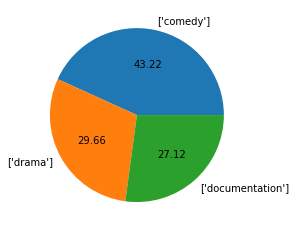

In [49]:
plt.pie(titles.genres.value_counts()[:3], labels=titles.genres.value_counts().index[:3],  autopct='%.2f');

## Top 10 movie genre..

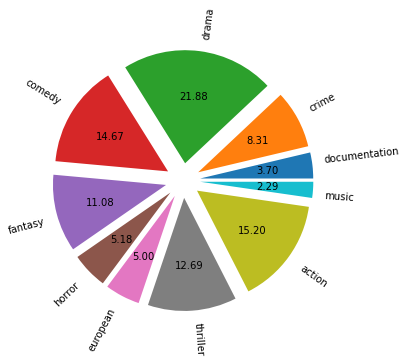

In [101]:
explode = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(list(unique_genre.values())[:10],explode= explode, labels=list(unique_genre.keys())[:10], autopct='%.2f',radius=1.3, rotatelabels=True);

## Observation
`Top 10 movie genre`
* 1. drama
* 2. action
* 3. comedy
* 4. thriller
* 5. fantasy
* 6. crime
* 7. horror
* 8. european
* 9. documentation
* 10. music

In [106]:
titles["type"].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

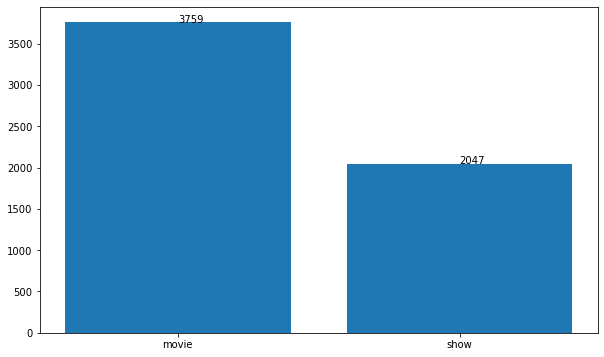

In [167]:
x = ["movie", "show"]
y = titles["type"].value_counts()

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
        

fig = plt.figure(figsize=(10, 6))
addlabels(x,y)
plt.bar(["movie", "show"], height=titles["type"].value_counts());

## Observation
`no. of movies` = 3759
`no. of shows` = 2047

In [139]:
titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [146]:
titles['production_countries'].value_counts()

['US']                      1950
['IN']                       605
['JP']                       266
[]                           232
['GB']                       219
                            ... 
['PR', 'US', 'GB', 'CN']       1
['GB', 'US', 'FR']             1
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['NG', 'CA']                   1
Name: production_countries, Length: 449, dtype: int64

## Top 3 production_countries

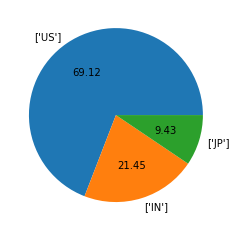

In [153]:
plt.pie(titles['production_countries'].value_counts()[:3],labels= titles['production_countries'].value_counts().index[:3], autopct='%.2f');

## Observation 
`top 3 production_countries`
* 1. US
* 2. IN
* 3. JP

In [156]:
titles['age_certification'].value_counts()

TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: age_certification, dtype: int64

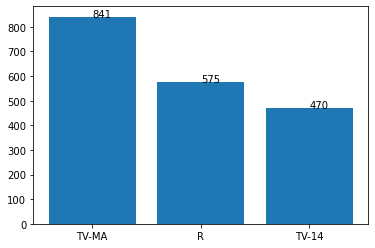

In [169]:
# use add lable values funcation
addlabels(x=titles['age_certification'].value_counts().index[:3], y =titles['age_certification'].value_counts()[:3])
plt.bar(x = titles['age_certification'].value_counts().index[:3], height=titles['age_certification'].value_counts()[:3]);

## observation
`Top 3 age certification`
* 1. TV-MA
* 2. R
* 3. TV-14

In [162]:
titles['imdb_score'].value_counts()

6.6    201
6.8    199
6.5    193
6.2    192
7.4    190
      ... 
2.0      1
1.9      1
2.4      1
1.6      1
1.8      1
Name: imdb_score, Length: 81, dtype: int64

## Observation 
`top 3 imbd score` 

`score`  `no._of_movie`
* 6.6  :   201
* 6.8   :  199
* 6.5   :  193


In [360]:
lis = []
for i in titles['genres']:
    if 'action' in i :
        #print(i)
        lis.append(i)

In [228]:
unique_genre['action']

690

In [270]:
titles[titles["genres"]== "['action', 'comedy', 'drama', 'family', 'scifi', 'animation']"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
353,ts21544,Transformers: Prime,SHOW,"Roll out with Optimus Prime, Bumblebee, Arcee,...",2010,TV-Y7,22,"['action', 'comedy', 'drama', 'family', 'scifi...",['US'],4.0,tt1659175,7.9,6500.0,31.514,8.0


In [ ]:
data = pd.read_csv('data.csv')

In [334]:
len(titles)

5806

In [346]:
data['id'].value_counts()

id           8967
ts288489      245
tm461829      245
tm1095880     245
ts254928      245
             ... 
ts90645         4
tm820338        4
tm835432        4
tm161029        4
tm810504        4
Name: id, Length: 1054, dtype: int64

In [411]:
for i in lis:
    data =titles[titles['genres'] == i]

In [412]:
df = pd.DataFrame(data)
df.to_csv('data.csv', mode = "a", index=False)

In [413]:
data = pd.read_csv('data.csv')
len(data)

10239

In [395]:
len(lis)

1053

In [418]:
data['id'].value_counts()

id          2111
ts301964      40
tm221883      40
ts81734       40
tm376421      40
            ... 
ts42137        2
ts35987        2
tm214825       2
tm233544       2
tm856634       2
Name: id, Length: 1054, dtype: int64

In [430]:
data.drop(columns='id', axis=1, inplace=True)

In [425]:
data.drop_duplicates(inplace=True)

In [461]:
def recommendation(genre_input: str):
    lis = []
    for i in titles['genres']:
        if genre_input in i :
            lis.append(i)
    for i in lis:
        data =titles[titles['genres'] == i]
        df = pd.DataFrame(data)
        df.to_csv('data.csv', mode = "a", index=False)
    data = pd.read_csv('data.csv')
    data.drop_duplicates(inplace=True)
    data.drop(columns='id', axis=1, inplace=True)
    
    return data['title'][:10]

In [464]:
%%time
mo = recommendation('drama')

Wall time: 11.8 s


In [465]:
mo

0                                         Taxi Driver
1                            Adam: His Song Continues
2                                              Okupas
3                                              Fartsa
4                                          Dirty John
5                                       Seven Seconds
6                        Surviving Escobar - Alias JJ
7                                        High Society
8    NY Prison Break: The Seduction of Joyce Mitchell
9                                            Catch.er
Name: title, dtype: object